# Lab 02: THỰC HÀNH IMAGE FILTER

In [1]:
import cv2
import matplotlib.pyplot as NguyenThanhThien
img = cv2.imread('cat.jpg')
img = img[:,:,::-1]
NguyenThanhThien.imshow(img)

ModuleNotFoundError: No module named 'cv2'

1. Sử dụng boxFilter: cv2.blur() hoặc cv2.boxFilter() để làm mờ ảnh (sử dụng nhiều thông số filter khác nhau), biểu diễn ảnh gốc và ảnh làm mờ cùng nhau để kiểm chứng.

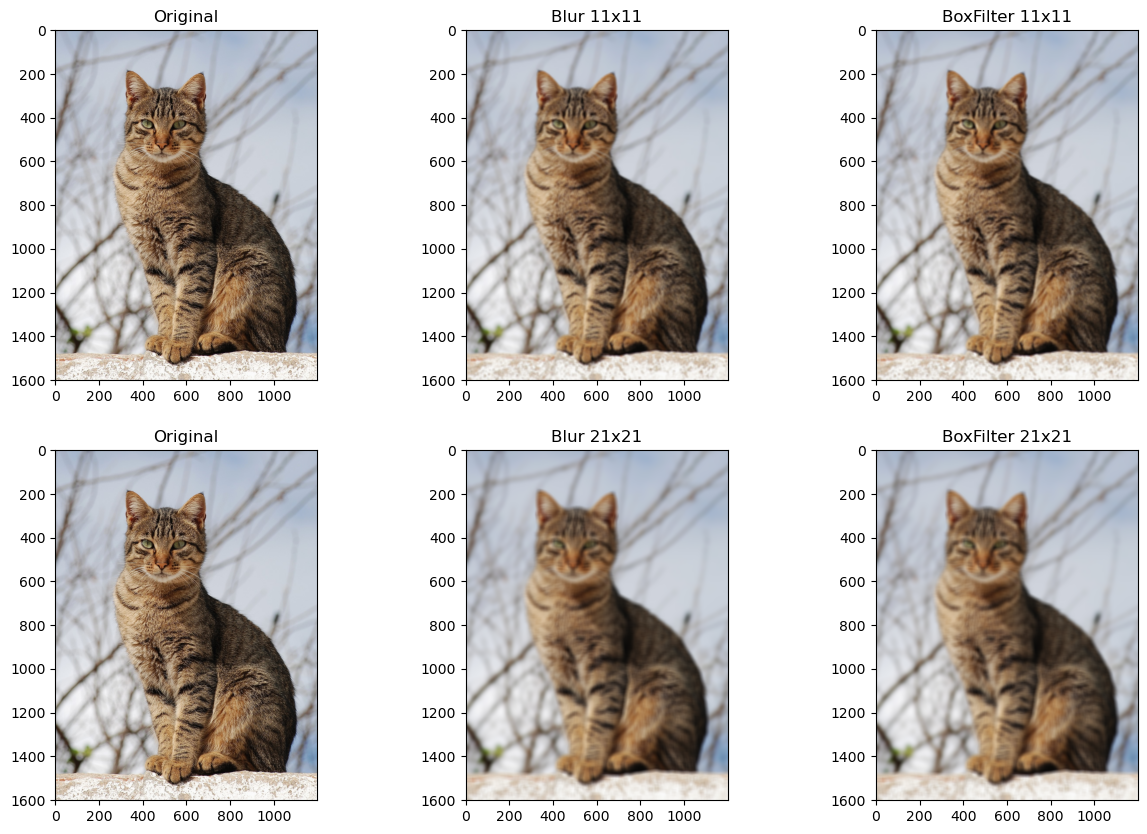

In [ ]:
blur1 = cv2.blur(img, (11,11))
blur2 = cv2.boxFilter(img, -1, (11,11))
blur3 = cv2.blur(img, (21,21))
blur4 = cv2.boxFilter(img, -1, (21,21))

NguyenThanhThien.figure(figsize=(15,10))

NguyenThanhThien.subplot(2,3,1)
NguyenThanhThien.imshow(img)
NguyenThanhThien.title("Original")

NguyenThanhThien.subplot(2,3,2)
NguyenThanhThien.imshow(blur1)
NguyenThanhThien.title("Blur 11x11")

NguyenThanhThien.subplot(2,3,3)
NguyenThanhThien.imshow(blur2)
NguyenThanhThien.title("BoxFilter 11x11")

NguyenThanhThien.subplot(2,3,4)
NguyenThanhThien.imshow(img)
NguyenThanhThien.title("Original")

NguyenThanhThien.subplot(2,3,5)
NguyenThanhThien.imshow(blur3)
NguyenThanhThien.title("Blur 21x21")

NguyenThanhThien.subplot(2,3,6)
NguyenThanhThien.imshow(blur4)
NguyenThanhThien.title("BoxFilter 21x21")

NguyenThanhThien.show()


2. Sử dụng Gaussian Filter # Lưu ý: kích thước bộ lọc là số lẻ.

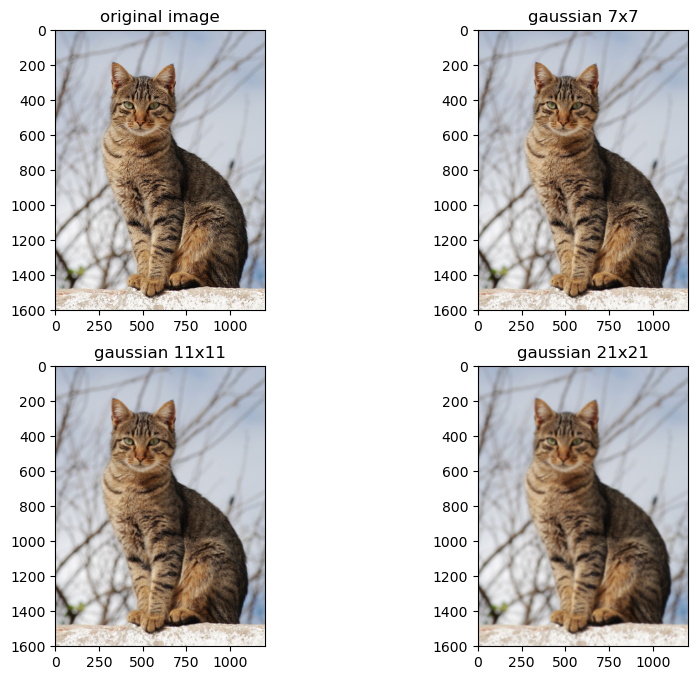

In [ ]:
gauss1 = cv2.GaussianBlur(img, (7,7), 0)
gauss2 = cv2.GaussianBlur(img, (11, 11), 0)
gauss3 = cv2.GaussianBlur(img, (21,21), 0)

NguyenThanhThien.figure(figsize=(10,8))

NguyenThanhThien.subplot(2,2,1)
NguyenThanhThien.imshow(img)
NguyenThanhThien.title("original image")

NguyenThanhThien.subplot(2,2,2)
NguyenThanhThien.imshow(gauss1)
NguyenThanhThien.title("gaussian 7x7")

NguyenThanhThien.subplot(2,2,3)
NguyenThanhThien.imshow(gauss2)
NguyenThanhThien.title("gaussian 11x11")

NguyenThanhThien.subplot(2,2,4)
NguyenThanhThien.imshow(gauss3)
NguyenThanhThien.title("gaussian 21x21")

NguyenThanhThien.show()

3. Sử dụng Median Filter 

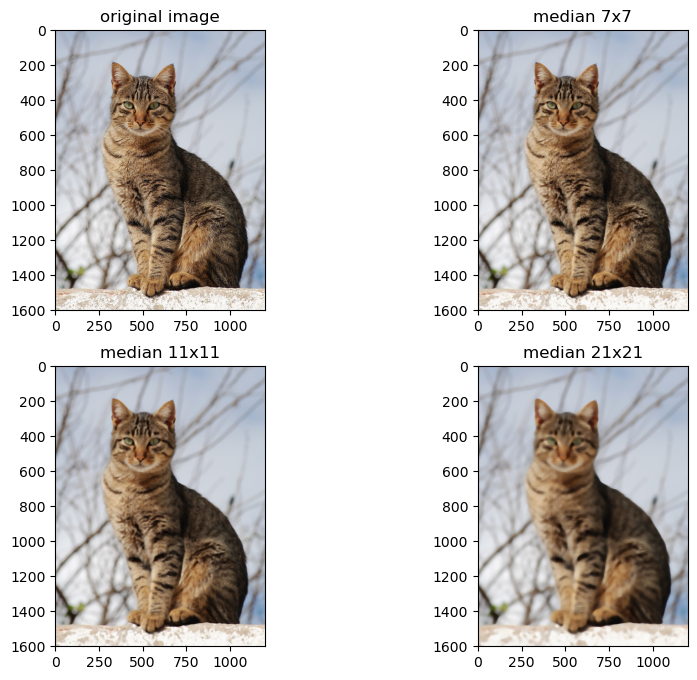

In [ ]:
med1 = cv2.medianBlur(img, 7)
med2 = cv2.medianBlur(img, 11)
med3 = cv2.medianBlur(img, 21)

NguyenThanhThien.figure(figsize=(10,8))

NguyenThanhThien.subplot(2,2,1)
NguyenThanhThien.imshow(img)
NguyenThanhThien.title("original image")

NguyenThanhThien.subplot(2,2,2)
NguyenThanhThien.imshow(med1)
NguyenThanhThien.title("median 7x7")

NguyenThanhThien.subplot(2,2,3)
NguyenThanhThien.imshow(med2)
NguyenThanhThien.title("median 11x11")

NguyenThanhThien.subplot(2,2,4)
NguyenThanhThien.imshow(med3)
NguyenThanhThien.title("median 21x21")

NguyenThanhThien.show()

4. Kiểm tra lại các bộ lọc trên với hai hình ảnh pepper noise dưới đây: 

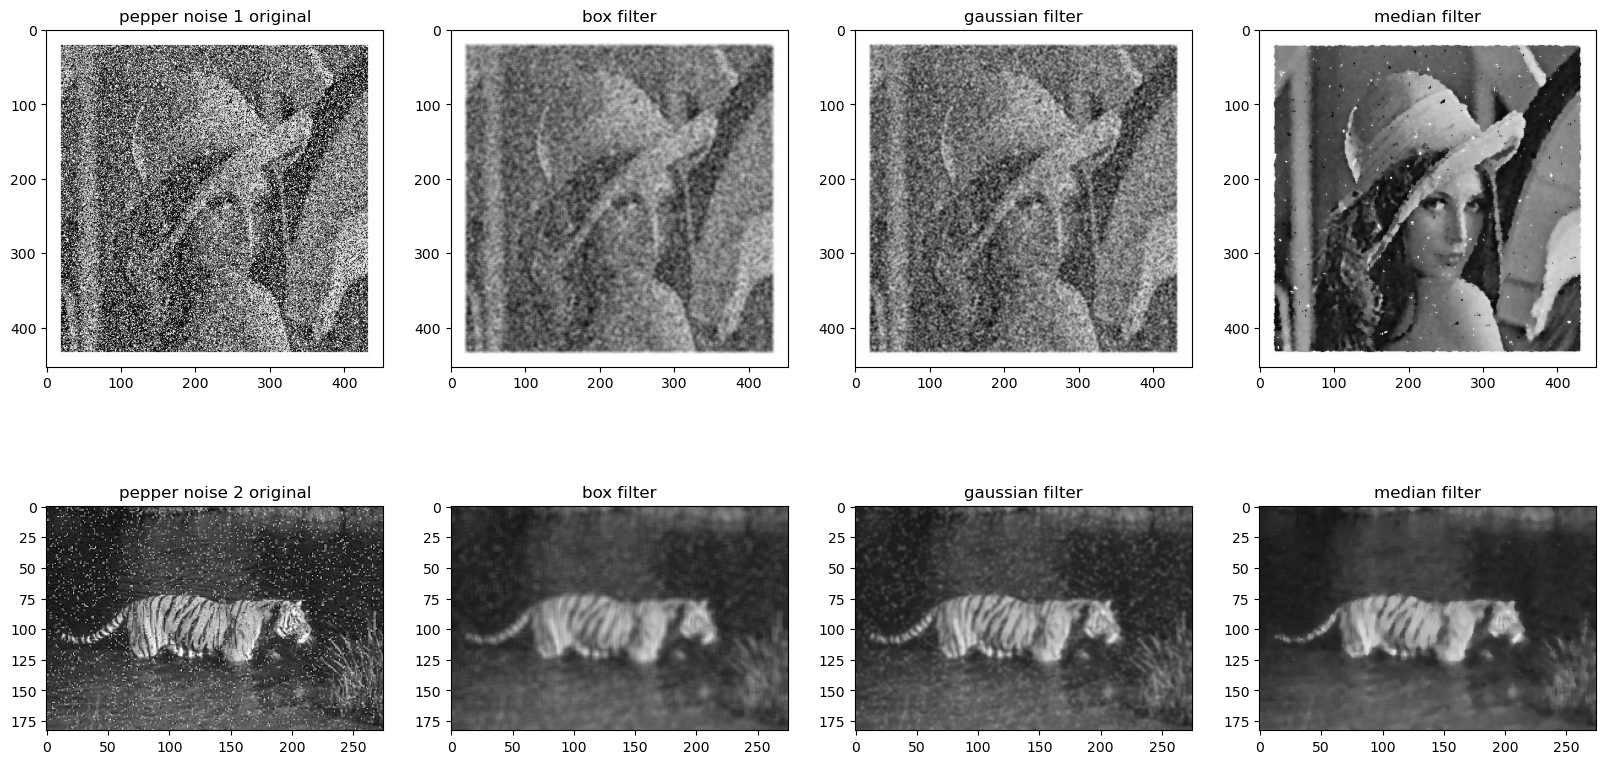

In [ ]:
import numpy as np
noise1 = cv2.imread('pepper_noise01.jpg')
noise1 = noise1[:,:,::-1]
noise2 = cv2.imread('pepper_noise02.jpg')
noise2 = noise2[:,:,::-1]

def box_filter(image, ksize):
    return cv2.blur(image, (ksize, ksize))
def gaussian_filter(image, ksize):
    return cv2.GaussianBlur(image, (ksize, ksize), 0)
def median_filter(image, ksize):
    return cv2.medianBlur(image, ksize)
NguyenThanhThien.figure(figsize=(20,10))

NguyenThanhThien.subplot(2,4,1)
NguyenThanhThien.imshow(noise1)
NguyenThanhThien.title("pepper noise 1 original")

NguyenThanhThien.subplot(2,4,2)
NguyenThanhThien.imshow(box_filter(noise1, 5))
NguyenThanhThien.title("box filter")

NguyenThanhThien.subplot(2,4,3)
NguyenThanhThien.imshow(gaussian_filter(noise1, 5))
NguyenThanhThien.title("gaussian filter")

NguyenThanhThien.subplot(2,4,4)
NguyenThanhThien.imshow(median_filter(noise1, 5))
NguyenThanhThien.title("median filter")

NguyenThanhThien.subplot(2,4,5)
NguyenThanhThien.imshow(noise2)
NguyenThanhThien.title("pepper noise 2 original")

NguyenThanhThien.subplot(2,4,6)
NguyenThanhThien.imshow(box_filter(noise2, 5))
NguyenThanhThien.title("box filter")

NguyenThanhThien.subplot(2,4,7)
NguyenThanhThien.imshow(gaussian_filter(noise2, 5))
NguyenThanhThien.title("gaussian filter")

NguyenThanhThien.subplot(2,4,8)
NguyenThanhThien.imshow(median_filter(noise2, 5))
NguyenThanhThien.title("median filter")

NguyenThanhThien.show()

5. Có nhận xét gì về các kích thước filter. 

##### Kích thước kernel càng lớn -> ảnh càng mờ mạnh
##### ksize = 3: làm mượt nhẹ, giữ chi tiết tốt
##### ksize = 5: mượt vừa 
##### ksize = 9, 11,…: mờ nhiều, mất biên và chi tiết
##### Kernel phải là số lẻ (3,5,7,...) để có tâm đối xứng.

6. Thực hành với Cân bằng sáng - equalizeHist, để cân bằng sáng, trước hết ta chuyển ảnh trắng đen (nếu có) sang ảnh màu. 

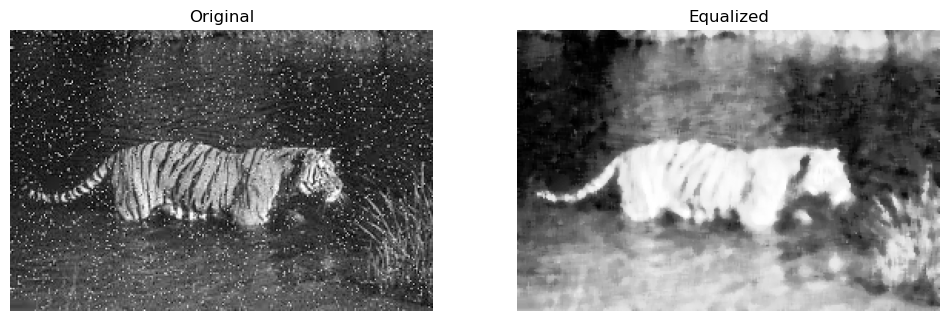

In [ ]:
img = cv2.imread('pepper_noise02.jpg')
blur = cv2.medianBlur(img,5)
blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
equalized = cv2.equalizeHist(blur)

NguyenThanhThien.figure(figsize=(12,4))

NguyenThanhThien.subplot(1,2,1)
NguyenThanhThien.imshow(img)
NguyenThanhThien.title("Original")
NguyenThanhThien.axis('off')
NguyenThanhThien.subplot(1,2,2)
NguyenThanhThien.imshow(equalized, cmap='gray')
NguyenThanhThien.title("Equalized")
NguyenThanhThien.axis('off')

NguyenThanhThien.show()

7. Bài tập trên lớp lý thuyết: FILTER bằng các phép toán số học và logic
Given two images as follow (with different sizes: 193x157 and 194x160) 


a. Crop two images to size 190x155

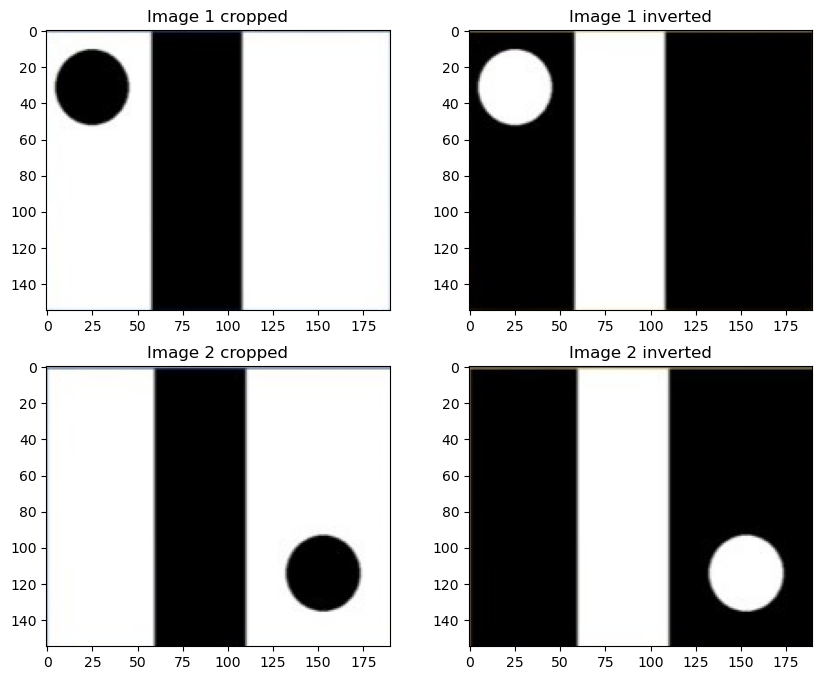

In [ ]:
img1 = cv2.imread('exT3_01.png')
img2 = cv2.imread('exT3_02.png')
img1 = img1[:155,1:191]
img2 = img2[:155,:190]
inv_img1 = cv2.bitwise_not(img1)
inv_img2 = cv2.bitwise_not(img2)

NguyenThanhThien.figure(figsize=(10,8))

NguyenThanhThien.subplot(2,2,1)
NguyenThanhThien.imshow(img1[:,:,::-1])
NguyenThanhThien.title("Image 1 cropped")

NguyenThanhThien.subplot(2,2,2)
NguyenThanhThien.imshow(inv_img1[:,:,::-1])
NguyenThanhThien.title("Image 1 inverted")

NguyenThanhThien.subplot(2,2,3)
NguyenThanhThien.imshow(img2[:,:,::-1])
NguyenThanhThien.title("Image 2 cropped")

NguyenThanhThien.subplot(2,2,4)
NguyenThanhThien.imshow(inv_img2[:,:,::-1])
NguyenThanhThien.title("Image 2 inverted")

NguyenThanhThien.show()

b. Transform images to negative ones.

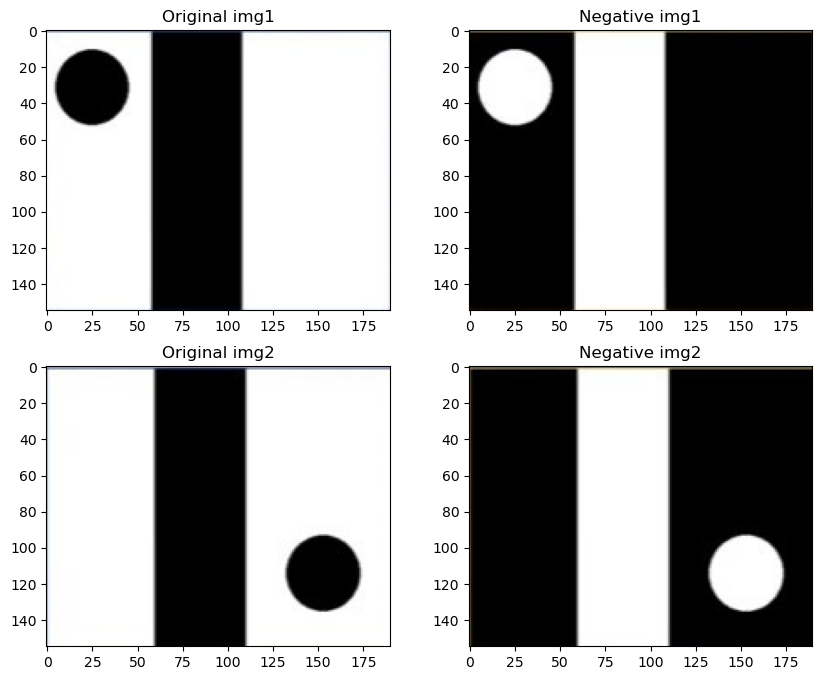

In [ ]:
neg1 = cv2.bitwise_not(img1)
neg2 = cv2.bitwise_not(img2)

NguyenThanhThien.figure(figsize=(10,8))

NguyenThanhThien.subplot(2,2,1)
NguyenThanhThien.imshow(img1[:,:,::-1])
NguyenThanhThien.title("Original img1")

NguyenThanhThien.subplot(2,2,2)
NguyenThanhThien.imshow(neg1[:,:,::-1])
NguyenThanhThien.title("Negative img1")

NguyenThanhThien.subplot(2,2,3)
NguyenThanhThien.imshow(img2[:,:,::-1])
NguyenThanhThien.title("Original img2")

NguyenThanhThien.subplot(2,2,4)
NguyenThanhThien.imshow(neg2[:,:,::-1])
NguyenThanhThien.title("Negative img2")

NguyenThanhThien.show()


c. Process to have an image which has only the “ball”
Nếu vẫn còn xuất hiện các vạch trắng, cách khắc phục như thế nào?


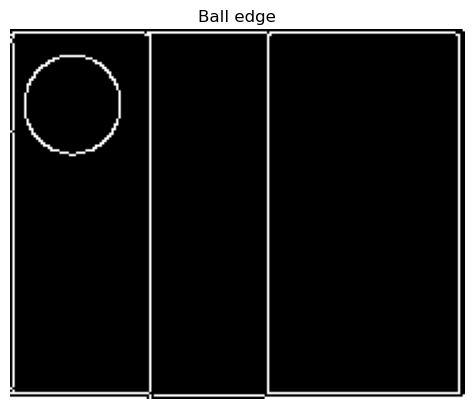

In [ ]:
img = cv2.imread('exT3_01.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

# Xóa đường thẳng đứng (thanh) bằng opening kernel dọc
kernel = np.ones((25,3), np.uint8)
clean = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)

# Lấy phần còn lại = biên quả bóng
ball_edge = cv2.subtract(edges, clean)

NguyenThanhThien.imshow(ball_edge, cmap='gray')
NguyenThanhThien.title("Ball edge")
NguyenThanhThien.axis('off')
NguyenThanhThien.show()


Một số bài tập mở rộng: 
1. Sử dụng Backward, forward, central gradient để lọc ảnh. 


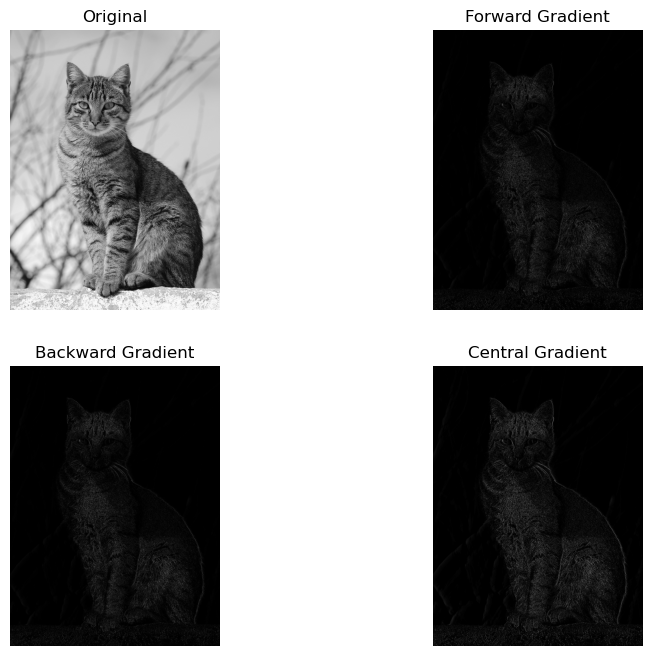

In [ ]:
img = cv2.imread('cat.jpg')
img = img[:,:,::-1]   
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

forward = np.array([[0, -1, 1]])
backward = np.array([[-1, 1, 0]])
central = np.array([[-1, 0, 1]]) / 2

fwd = cv2.filter2D(gray, -1, forward)
bwd = cv2.filter2D(gray, -1, backward)
cen = cv2.filter2D(gray, -1, central)

NguyenThanhThien.figure(figsize=(10,8))

NguyenThanhThien.subplot(2,2,1)
NguyenThanhThien.imshow(gray, cmap='gray')
NguyenThanhThien.title("Original")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(2,2,2)
NguyenThanhThien.imshow(fwd, cmap='gray')
NguyenThanhThien.title("Forward Gradient")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(2,2,3)
NguyenThanhThien.imshow(bwd, cmap='gray')
NguyenThanhThien.title("Backward Gradient")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(2,2,4)
NguyenThanhThien.imshow(cen, cmap='gray')
NguyenThanhThien.title("Central Gradient")
NguyenThanhThien.axis('off')

NguyenThanhThien.show()

2. Sử dụng Finite difference filter để lọc ảnh nhiễu. 

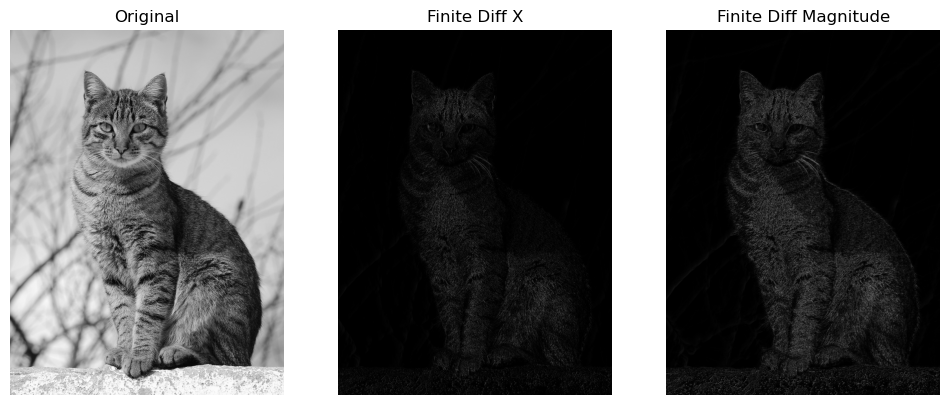

In [ ]:
img = cv2.imread('cat.jpg')
img = img[:,:,::-1]
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])

gx = cv2.filter2D(gray, -1, dx)
gy = cv2.filter2D(gray, -1, dy)

grad = np.abs(gx) + np.abs(gy)

NguyenThanhThien.figure(figsize=(12,5))

NguyenThanhThien.subplot(1,3,1)
NguyenThanhThien.imshow(gray, cmap='gray')
NguyenThanhThien.title("Original")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(1,3,2)
NguyenThanhThien.imshow(gx, cmap='gray')
NguyenThanhThien.title("Finite Diff X")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(1,3,3)
NguyenThanhThien.imshow(grad, cmap='gray')
NguyenThanhThien.title("Finite Diff Magnitude")
NguyenThanhThien.axis('off')

NguyenThanhThien.show()


3. Sử dụng Gaussian filter để lọc ảnh. 

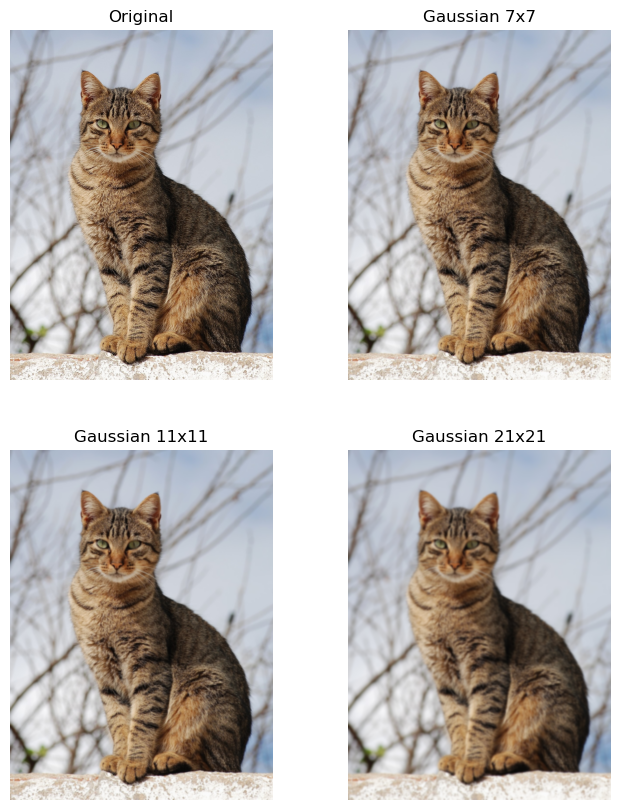

In [ ]:
blur3 = cv2.GaussianBlur(img, (7,7), 0)
blur7 = cv2.GaussianBlur(img, (11,11), 0)
blur11 = cv2.GaussianBlur(img, (21,21), 0)

NguyenThanhThien.figure(figsize=(8,10))

NguyenThanhThien.subplot(2,2,1)
NguyenThanhThien.imshow(img)
NguyenThanhThien.title("Original")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(2,2,2)
NguyenThanhThien.imshow(blur3)
NguyenThanhThien.title("Gaussian 7x7")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(2,2,3)
NguyenThanhThien.imshow(blur7)
NguyenThanhThien.title("Gaussian 11x11")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(2,2,4)
NguyenThanhThien.imshow(blur11)
NguyenThanhThien.title("Gaussian 21x21")
NguyenThanhThien.axis('off')

NguyenThanhThien.show()

4. Sử dụng Sobel detector để xác định biên của ảnh. 

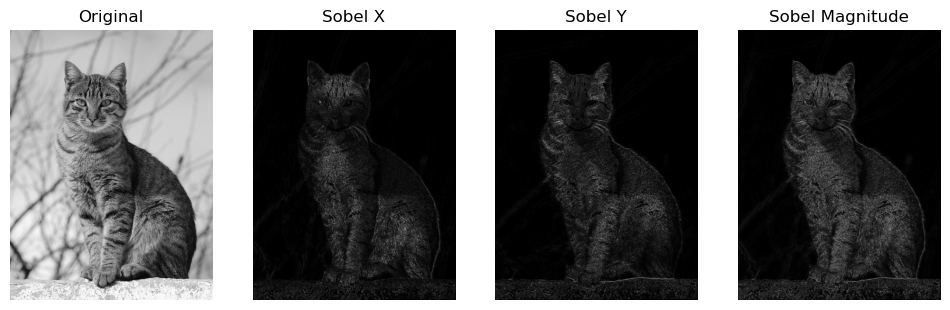

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

sobel_mag = cv2.magnitude(sobel_x, sobel_y)

NguyenThanhThien.figure(figsize=(12,5))

NguyenThanhThien.subplot(1,4,1)
NguyenThanhThien.imshow(gray, cmap='gray')
NguyenThanhThien.title("Original")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(1,4,2)
NguyenThanhThien.imshow(np.abs(sobel_x), cmap='gray')
NguyenThanhThien.title("Sobel X")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(1,4,3)
NguyenThanhThien.imshow(np.abs(sobel_y), cmap='gray')
NguyenThanhThien.title("Sobel Y")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(1,4,4)
NguyenThanhThien.imshow(sobel_mag, cmap='gray')
NguyenThanhThien.title("Sobel Magnitude")
NguyenThanhThien.axis('off')

NguyenThanhThien.show()

5. Sử dụng Canny edge detector để xác định các cạnh góc ảnh. 

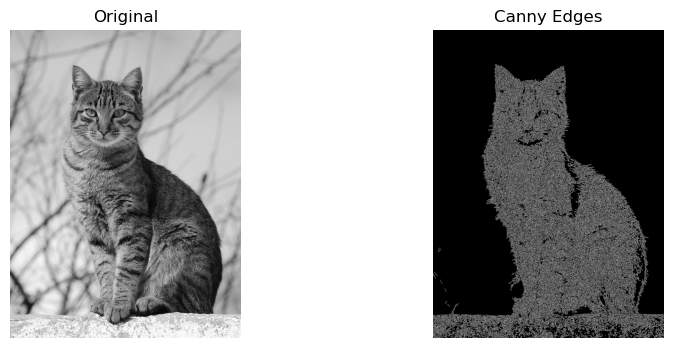

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray, 50, 150)

NguyenThanhThien.figure(figsize=(10,4))

NguyenThanhThien.subplot(1,2,1)
NguyenThanhThien.imshow(gray, cmap='gray')
NguyenThanhThien.title("Original")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(1,2,2)
NguyenThanhThien.imshow(edges, cmap='gray')
NguyenThanhThien.title("Canny Edges")
NguyenThanhThien.axis('off')

NguyenThanhThien.show()

6. Sử dụng Hough transform để xác định các đường thẳng trong ảnh. 

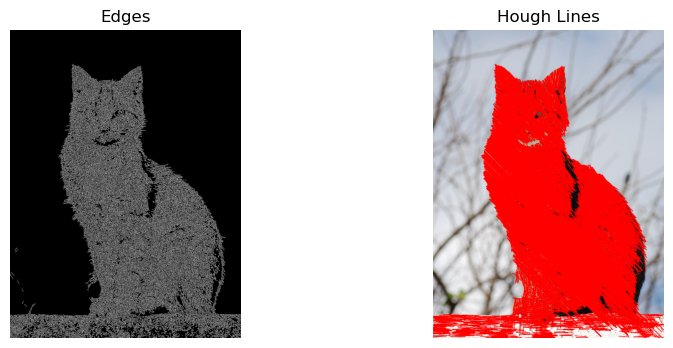

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100,
                        minLineLength=50, maxLineGap=10)

img_lines = img.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_lines, (x1, y1), (x2, y2), (255,0,0), 2)

NguyenThanhThien.figure(figsize=(10,4))

NguyenThanhThien.subplot(1,2,1)
NguyenThanhThien.imshow(edges, cmap='gray')
NguyenThanhThien.title("Edges")
NguyenThanhThien.axis('off')

NguyenThanhThien.subplot(1,2,2)
NguyenThanhThien.imshow(img_lines)
NguyenThanhThien.title("Hough Lines")
NguyenThanhThien.axis('off')

NguyenThanhThien.show()